In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyfolio.timeseries import perf_stats
import talib

In [2]:
results = pd.read_pickle('results_strategy_2a_2008-2018.pickle')
returns = results.returns

In [3]:
equity_curve = (returns + 1).cumprod()

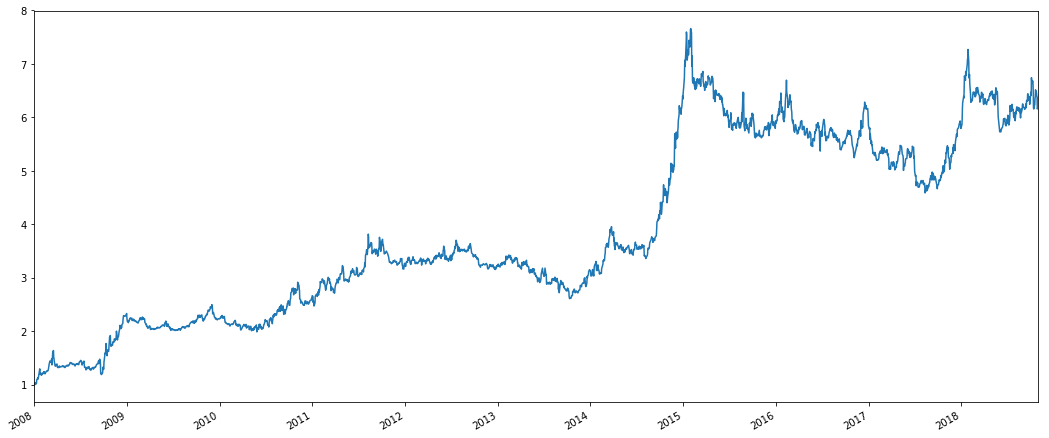

In [4]:
equity_curve.plot(figsize=(18,8), xlim=('2008-01-01', '2018-10-31'));

In [5]:
SLOW_MA = 200
FAST_MA = 50
equity_curve = pd.DataFrame(equity_curve) 
equity_curve.rename(columns={'returns': 'equity'}, inplace=True)
equity_curve['slow_ma'] = talib.EMA(equity_curve.equity.values, timeperiod=SLOW_MA)
equity_curve['fast_ma'] = talib.EMA(equity_curve.equity.values, timeperiod=FAST_MA)

In [6]:
upper, middle, lower = talib.BBANDS(equity_curve.equity.values, timeperiod=SLOW_MA)
bollinger = pd.DataFrame(dict(upper=upper, middle=middle, lower=lower), index=equity_curve.index)
bollinger.tail()

,lower,middle,upper
2018-10-25 20:00:00+00:00,5.742704,6.292807,6.842911
2018-10-26 20:00:00+00:00,5.741551,6.290933,6.840315
2018-10-29 20:00:00+00:00,5.742751,6.288017,6.833284
2018-10-30 20:00:00+00:00,5.743547,6.285810,6.828072
2018-10-31 20:00:00+00:00,5.747049,6.283389,6.819729


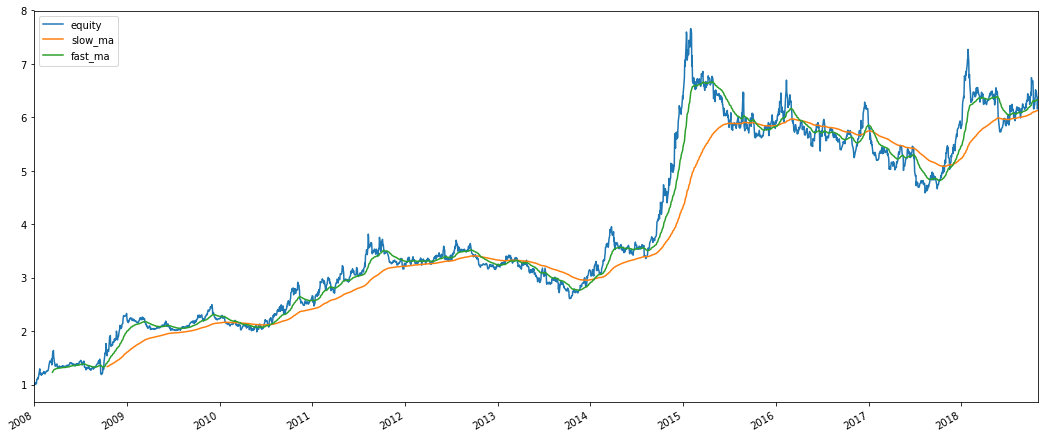

In [7]:
equity_curve.plot(figsize=(18,8), xlim=('2008-01-01', '2018-10-31'));

In [8]:
equity_curve.tail()

,equity,slow_ma,fast_ma
2018-10-25 20:00:00+00:00,6.384478,6.126405,6.327725
2018-10-26 20:00:00+00:00,6.157413,6.126714,6.321046
2018-10-29 20:00:00+00:00,6.191005,6.127354,6.315947
2018-10-30 20:00:00+00:00,6.251151,6.128585,6.313406
2018-10-31 20:00:00+00:00,6.372309,6.131010,6.315716


In [9]:
new_chart = equity_curve.join(bollinger)

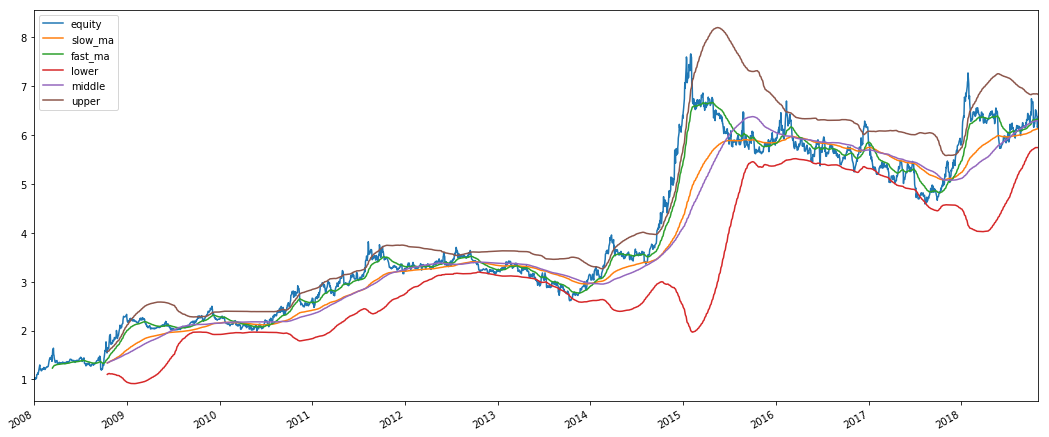

In [10]:
new_chart.plot(figsize=(18,8), xlim=('2008-01-01', '2018-10-31'));

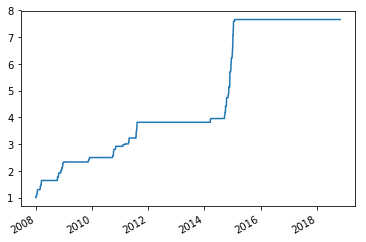

In [11]:
equity_curve['high_water'] = equity_curve['equity'].cummax()
equity_curve['high_water'].plot();

In [16]:
equity_curve['return'] = equity_curve['equity'].pct_change()
equity_curve['std'] = equity_curve['return'].rolling(SLOW_MA).std()
equity_curve['monthly_std'] = equity_curve['std'] * np.sqrt(21)
equity_curve.tail()

,equity,slow_ma,fast_ma,high_water,return,std,monthly_std
2018-10-25 20:00:00+00:00,6.384478,6.126405,6.327725,7.660584,-0.001402,0.013247,0.060706
2018-10-26 20:00:00+00:00,6.157413,6.126714,6.321046,7.660584,-0.035565,0.013348,0.061168
2018-10-29 20:00:00+00:00,6.191005,6.127354,6.315947,7.660584,0.005456,0.013089,0.059982
2018-10-30 20:00:00+00:00,6.251151,6.128585,6.313406,7.660584,0.009715,0.013082,0.059950
2018-10-31 20:00:00+00:00,6.372309,6.131010,6.315716,7.660584,0.019382,0.013039,0.059750


In [19]:
equity_curve['mean_return'] = equity_curve['return'].rolling(SLOW_MA).mean()
equity_curve['mean_monthly_return'] = (equity_curve['mean_return'] + 1)**21 -1
equity_curve.tail()

,equity,slow_ma,fast_ma,high_water,return,std,monthly_std,mean_return,mean_monthly_return
2018-10-25 20:00:00+00:00,6.384478,6.126405,6.327725,7.660584,-0.001402,0.013247,0.060706,0.000106,0.002227
2018-10-26 20:00:00+00:00,6.157413,6.126714,6.321046,7.660584,-0.035565,0.013348,0.061168,-0.000207,-0.004329
2018-10-29 20:00:00+00:00,6.191005,6.127354,6.315947,7.660584,0.005456,0.013089,0.059982,-0.000365,-0.007628
2018-10-30 20:00:00+00:00,6.251151,6.128585,6.313406,7.660584,0.009715,0.013082,0.059950,-0.000256,-0.005358
2018-10-31 20:00:00+00:00,6.372309,6.131010,6.315716,7.660584,0.019382,0.013039,0.059750,-0.000281,-0.005891


In [22]:
equity_curve['cutoff'] = equity_curve['high_water'] - \
                        (abs(equity_curve['mean_monthly_return']) + 2 * equity_curve['monthly_std']) * \
                        equity_curve['equity']

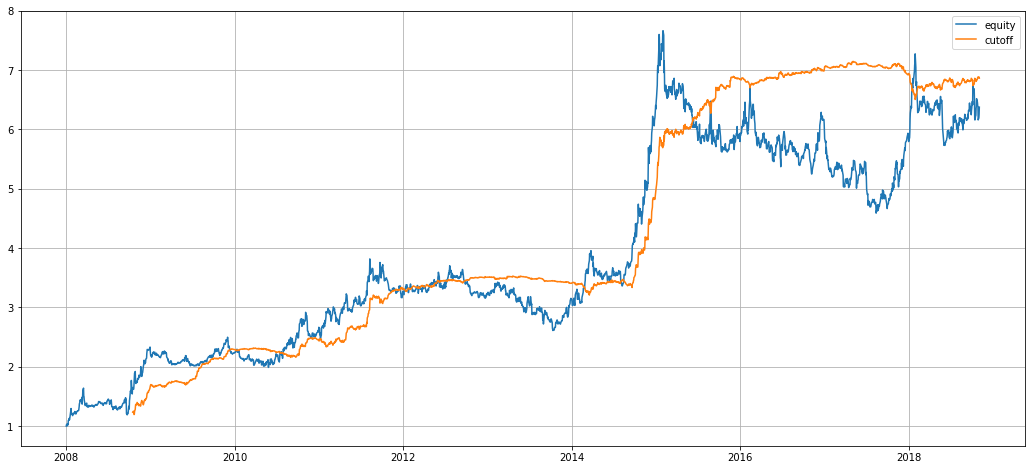

In [30]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.plot(equity_curve['equity'])
ax.plot(equity_curve['cutoff'])
ax.legend()
ax.grid()
plt.show()